In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
from geopy.distance import  geodesic
import sys
sys.path.append('..') # Add parent directory to path to import from src

# set display options
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Load the dataset
file_path = '../data/raw/Waste_Management_and_Recycling_India.csv'
df = pd.read_csv(file_path)
df.head()

,City/District,Waste Type,Waste Generated (Tons/Day),Recycling Rate (%),Population Density (People/km²),Municipal Efficiency Score (1-10),Disposal Method,Cost of Waste Management (₹/Ton),Awareness Campaigns Count,Landfill Name,"Landfill Location (Lat, Long)",Landfill Capacity (Tons),Year
0,Mumbai,Plastic,6610,68,11191,9,Composting,3056,14,Mumbai Landfill,"22.4265, 77.4931",45575,2019
1,Mumbai,Organic,1181,56,11191,5,Composting,2778,12,Mumbai Landfill,"22.4265, 77.4931",45575,2019
2,Mumbai,E-Waste,8162,53,11191,8,Incineration,3390,13,Mumbai Landfill,"22.4265, 77.4931",45575,2019
3,Mumbai,Construction,8929,56,11191,5,Landfill,1498,14,Mumbai Landfill,"22.4265, 77.4931",45575,2019
4,Mumbai,Hazardous,5032,44,11191,7,Recycling,2221,16,Mumbai Landfill,"22.4265, 77.4931",45575,2019


In [3]:
# Intial data inspection
df.dtypes

City/District                        object
Waste Type                           object
Waste Generated (Tons/Day)            int64
Recycling Rate (%)                    int64
Population Density (People/km²)       int64
Municipal Efficiency Score (1-10)     int64
Disposal Method                      object
Cost of Waste Management (₹/Ton)      int64
Awareness Campaigns Count             int64
Landfill Name                        object
Landfill Location (Lat, Long)        object
Landfill Capacity (Tons)              int64
Year                                  int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   City/District                      850 non-null    object
 1   Waste Type                         850 non-null    object
 2   Waste Generated (Tons/Day)         850 non-null    int64 
 3   Recycling Rate (%)                 850 non-null    int64 
 4   Population Density (People/km²)    850 non-null    int64 
 5   Municipal Efficiency Score (1-10)  850 non-null    int64 
 6   Disposal Method                    850 non-null    object
 7   Cost of Waste Management (₹/Ton)   850 non-null    int64 
 8   Awareness Campaigns Count          850 non-null    int64 
 9   Landfill Name                      850 non-null    object
 10  Landfill Location (Lat, Long)      850 non-null    object
 11  Landfill Capacity (Tons)           850 non-null    int64 
 12  Year    

In [5]:
# Missing values Analysis
df.isna().sum()

City/District                        0
Waste Type                           0
Waste Generated (Tons/Day)           0
Recycling Rate (%)                   0
Population Density (People/km²)      0
Municipal Efficiency Score (1-10)    0
Disposal Method                      0
Cost of Waste Management (₹/Ton)     0
Awareness Campaigns Count            0
Landfill Name                        0
Landfill Location (Lat, Long)        0
Landfill Capacity (Tons)             0
Year                                 0
dtype: int64

In [6]:
# We don't have any missing value so we don't have to worry about handling missing values

In [7]:
# Feature Engineering - Geospatial Features
print("\n Geospatial Feature Engineering ============")
# initialise another variable df_clean to store the df
df_clean = df.copy()
# df_clean
df_clean[['Landfill_Lat', 'Landfill_Lon']] = df_clean['Landfill Location (Lat, Long)'] \
    .str.split(',', expand=True).astype(float)

# calculate average coordinates for each city
city_coords = df_clean.groupby('City/District')[['Landfill_Lat', 'Landfill_Lon']].mean()
city_coords


 Geospatial Feature Engineering ============


,Landfill_Lat,Landfill_Lon
City/District,,
Agra,32.4069,92.1176
Ahmedabad,19.3868,72.7845
Allahabad,35.9642,87.6951
Amritsar,22.6059,88.4682
Bengaluru,15.7581,85.4837
Bhopal,18.3203,75.8314
Chennai,29.4633,80.8873
Coimbatore,31.9729,76.5516
Delhi,30.2591,91.9376


In [8]:
# Feature Engineering Additional Feature
print("\n ======= Additional Feature Engineering =======")

# Waste generation per capita
df_clean['Waste_Per_Capita'] = df_clean["Waste Generated (Tons/Day)"] / df_clean["Population Density (People/km²)"]

# Cost efficiency
df_clean["Cost_Efficiency"] = df_clean['Recycling Rate (%)'] / df_clean['Cost of Waste Management (₹/Ton)']

# Year as Categorical (might capture non linear trends)
df_clean['Year_Categorical'] = df_clean['Year'].astype('category')

print("Additional features created:")
print(f"  - Waste_Per_Capita (tons per person)")
print(f"  - Cost_Efficiency (recycling rate per cost unit)")
print(f"  - Year_Categorical (year as categorical variable)")



 ======= Additional Feature Engineering =======
Additional features created:
  - Waste_Per_Capita (tons per person)
  - Cost_Efficiency (recycling rate per cost unit)
  - Year_Categorical (year as categorical variable)


In [9]:
df_clean

,City/District,Waste Type,Waste Generated (Tons/Day),Recycling Rate (%),Population Density (People/km²),Municipal Efficiency Score (1-10),Disposal Method,Cost of Waste Management (₹/Ton),Awareness Campaigns Count,Landfill Name,"Landfill Location (Lat, Long)",Landfill Capacity (Tons),Year,Landfill_Lat,Landfill_Lon,Waste_Per_Capita,Cost_Efficiency,Year_Categorical
0,Mumbai,Plastic,6610,68,11191,9,Composting,3056,14,Mumbai Landfill,"22.4265, 77.4931",45575,2019,22.4265,77.4931,0.590653,0.022251,2019
1,Mumbai,Organic,1181,56,11191,5,Composting,2778,12,Mumbai Landfill,"22.4265, 77.4931",45575,2019,22.4265,77.4931,0.105531,0.020158,2019
2,Mumbai,E-Waste,8162,53,11191,8,Incineration,3390,13,Mumbai Landfill,"22.4265, 77.4931",45575,2019,22.4265,77.4931,0.729336,0.015634,2019
3,Mumbai,Construction,8929,56,11191,5,Landfill,1498,14,Mumbai Landfill,"22.4265, 77.4931",45575,2019,22.4265,77.4931,0.797873,0.037383,2019
4,Mumbai,Hazardous,5032,44,11191,7,Recycling,2221,16,Mumbai Landfill,"22.4265, 77.4931",45575,2019,22.4265,77.4931,0.449647,0.019811,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,Gwalior,Plastic,6842,42,11280,8,Recycling,3546,15,Gwalior Landfill,"10.9566, 91.6565",54460,2023,10.9566,91.6565,0.606560,0.011844,2023
846,Gwalior,Organic,5233,38,11280,10,Recycling,1146,5,Gwalior Landfill,"10.9566, 91.6565",54460,2023,10.9566,91.6565,0.463918,0.033159,2023
847,Gwalior,E-Waste,9903,41,11280,7,Landfill,3260,4,Gwalior Landfill,"10.9566, 91.6565",54460,2023,10.9566,91.6565,0.877926,0.012577,2023
848,Gwalior,Construction,7540,77,11280,6,Composting,4220,7,Gwalior Landfill,"10.9566, 91.6565",54460,2023,10.9566,91.6565,0.668440,0.018246,2023


In [10]:
# Handle Data Leakage - Remove Problematic Feature
# Disposal Method is highly correlated with target - likely causes leakage
print("Dropping 'Disposal Method' to avoid data leakage (high correlation with target)")
features_to_drop = ['Disposal Method', 'Landfill Location (Lat, Long)']
df_final = df_clean.drop(columns=features_to_drop)
print(f"Features dropped: {features_to_drop}")
print(f"Final dataset shape: {df_final.shape}")

Dropping 'Disposal Method' to avoid data leakage (high correlation with target)
Features dropped: ['Disposal Method', 'Landfill Location (Lat, Long)']
Final dataset shape: (850, 16)


In [11]:
# Prepare features for modelling

# Separate features and target
X = df_final.drop(columns=['Recycling Rate (%)'])
y = df_final['Recycling Rate (%)']

In [12]:
# Identify feature types
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Numerical Features", numerical_features)
print(f"Categorical Features", categorical_features)


Numerical Features ['Waste Generated (Tons/Day)', 'Population Density (People/km²)', 'Municipal Efficiency Score (1-10)', 'Cost of Waste Management (₹/Ton)', 'Awareness Campaigns Count', 'Landfill Capacity (Tons)', 'Year', 'Landfill_Lat', 'Landfill_Lon', 'Waste_Per_Capita', 'Cost_Efficiency']
Categorical Features ['City/District', 'Waste Type', 'Landfill Name', 'Year_Categorical']


In [13]:
# Create processing pipeline

# Numerical Pipeline
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical Pipeline
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', TargetEncoder(random_state=42) )
])

# Combine Pipelines
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

print("Preprocessing pipeline created successfully")
print(preprocessor)

Preprocessing pipeline created successfully
ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Waste Generated (Tons/Day)',
                                  'Population Density (People/km²)',
                                  'Municipal Efficiency Score (1-10)',
                                  'Cost of Waste Management (₹/Ton)',
                                  'Awareness Campaigns Count',
                                  'Landfill Capacity (Tons)', 'Year',
                                  'Landfill_Lat', 'Landfill_Lon',
                                  'Waste_Per_Capita', 'Cost_Efficiency']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                        

In [14]:
# Fit and Transform the Data
print("\n=== FITTING PREPROCESSOR ===")

# Fit the preprocessor
X_processed = preprocessor.fit_transform(X,y)

print(f"Original features shape: {X.shape}")
print(f"Processed features shape: {X_processed.shape}")
print(f"Target shape: {y.shape}")



=== FITTING PREPROCESSOR ===
Original features shape: (850, 15)
Processed features shape: (850, 235)
Target shape: (850,)


In [15]:
# Save the preprocessed data and preprocessor
print("\n=== SAVING PREPROCESSED DATA ===")
processed_data = pd.DataFrame(X_processed)
processed_data["Recycling_Rate"] = y.values


=== SAVING PREPROCESSED DATA ===


In [16]:
# Get feature names after preprocessing

# Use sklearn to get feature names automatically
feature_names = preprocessor.get_feature_names_out()

# Wrap into DataFrame with correct names
processed_data = pd.DataFrame(X_processed, columns=feature_names)

# Add target variable
processed_data['Recycling_Rate'] = y.values

processed_data


,num__Waste Generated (Tons/Day),num__Population Density (People/km²),num__Municipal Efficiency Score (1-10),num__Cost of Waste Management (₹/Ton),num__Awareness Campaigns Count,num__Landfill Capacity (Tons),num__Year,num__Landfill_Lat,num__Landfill_Lon,num__Waste_Per_Capita,num__Cost_Efficiency,cat__City/District_30,cat__City/District_31,cat__City/District_32,cat__City/District_33,cat__City/District_34,cat__City/District_35,cat__City/District_36,cat__City/District_37,cat__City/District_38,cat__City/District_39,cat__City/District_40,cat__City/District_41,cat__City/District_42,cat__City/District_43,cat__City/District_44,cat__City/District_45,cat__City/District_46,cat__City/District_47,cat__City/District_48,cat__City/District_49,cat__City/District_50,cat__City/District_51,cat__City/District_52,cat__City/District_53,cat__City/District_54,cat__City/District_55,cat__City/District_56,cat__City/District_57,cat__City/District_58,cat__City/District_59,cat__City/District_60,cat__City/District_61,cat__City/District_62,cat__City/District_63,cat__City/District_64,cat__City/District_65,cat__City/District_66,cat__City/District_67,cat__City/District_68,cat__City/District_69,cat__City/District_70,cat__City/District_71,cat__City/District_72,cat__City/District_73,cat__City/District_74,cat__City/District_75,cat__City/District_76,cat__City/District_77,cat__City/District_78,cat__City/District_79,cat__City/District_80,cat__City/District_81,cat__City/District_82,cat__City/District_83,cat__City/District_84,cat__City/District_85,cat__Waste Type_30,cat__Waste Type_31,cat__Waste Type_32,cat__Waste Type_33,cat__Waste Type_34,cat__Waste Type_35,cat__Waste Type_36,cat__Waste Type_37,cat__Waste Type_38,cat__Waste Type_39,cat__Waste Type_40,cat__Waste Type_41,cat__Waste Type_42,cat__Waste Type_43,cat__Waste Type_44,cat__Waste Type_45,cat__Waste Type_46,cat__Waste Type_47,cat__Waste Type_48,cat__Waste Type_49,cat__Waste Type_50,cat__Waste Type_51,cat__Waste Type_52,cat__Waste Type_53,cat__Waste Type_54,cat__Waste Type_55,cat__Waste Type_56,cat__Waste Type_57,cat__Waste Type_58,cat__Waste Type_59,cat__Waste Type_60,cat__Waste Type_61,cat__Waste Type_62,cat__Waste Type_63,cat__Waste Type_64,cat__Waste Type_65,cat__Waste Type_66,cat__Waste Type_67,cat__Waste Type_68,cat__Waste Type_69,cat__Waste Type_70,cat__Waste Type_71,cat__Waste Type_72,cat__Waste Type_73,cat__Waste Type_74,cat__Waste Type_75,cat__Waste Type_76,cat__Waste Type_77,cat__Waste Type_78,cat__Waste Type_79,cat__Waste Type_80,cat__Waste Type_81,cat__Waste Type_82,cat__Waste Type_83,cat__Waste Type_84,cat__Waste Type_85,cat__Landfill Name_30,cat__Landfill Name_31,cat__Landfill Name_32,cat__Landfill Name_33,cat__Landfill Name_34,cat__Landfill Name_35,cat__Landfill Name_36,cat__Landfill Name_37,cat__Landfill Name_38,cat__Landfill Name_39,cat__Landfill Name_40,cat__Landfill Name_41,cat__Landfill Name_42,cat__Landfill Name_43,cat__Landfill Name_44,cat__Landfill Name_45,cat__Landfill Name_46,cat__Landfill Name_47,cat__Landfill Name_48,cat__Landfill Name_49,cat__Landfill Name_50,cat__Landfill Name_51,cat__Landfill Name_52,cat__Landfill Name_53,cat__Landfill Name_54,cat__Landfill Name_55,cat__Landfill Name_56,cat__Landfill Name_57,cat__Landfill Name_58,cat__Landfill Name_59,cat__Landfill Name_60,cat__Landfill Name_61,cat__Landfill Name_62,cat__Landfill Name_63,cat__Landfill Name_64,cat__Landfill Name_65,cat__Landfill Name_66,cat__Landfill Name_67,cat__Landfill Name_68,cat__Landfill Name_69,cat__Landfill Name_70,cat__Landfill Name_71,cat__Landfill Name_72,cat__Landfill Name_73,cat__Landfill Name_74,cat__Landfill Name_75,cat__Landfill Name_76,cat__Landfill Name_77,cat__Landfill Name_78,cat__Landfill Name_79,cat__Landfill Name_80,cat__Landfill Name_81,cat__Landfill Name_82,cat__Landfill Name_83,cat__Landfill Name_84,cat__Landfill Name_85,cat__Year_Categorical_30,cat__Year_Categorical_31,cat__Year_Categorical_32,cat__Year_Categorical_33,cat__Year_Categorical_34,cat__Year_Categorical_35,cat__Year_Categorical_36,

In [17]:
# Save to files
processed_data.to_csv("../data/processed/cleaned_data.csv", index=False)
joblib.dump(preprocessor, '../models/preprocessor.pkl')

print("Preprocessed data saved to: ../data/processed/cleaned_data.csv")
print("Preprocessor saved to: ../models/preprocessor.pkl")

Preprocessed data saved to: ../data/processed/cleaned_data.csv
Preprocessor saved to: ../models/preprocessor.pkl


In [18]:
# Verify the preprocessing
print("\n=== VERIFICATION ===")
print("First 5 rows of processed data:")
display(processed_data.head())

print("\nProcessed data description:")
print(processed_data.describe())


=== VERIFICATION ===
First 5 rows of processed data:


,num__Waste Generated (Tons/Day),num__Population Density (People/km²),num__Municipal Efficiency Score (1-10),num__Cost of Waste Management (₹/Ton),num__Awareness Campaigns Count,num__Landfill Capacity (Tons),num__Year,num__Landfill_Lat,num__Landfill_Lon,num__Waste_Per_Capita,num__Cost_Efficiency,cat__City/District_30,cat__City/District_31,cat__City/District_32,cat__City/District_33,cat__City/District_34,cat__City/District_35,cat__City/District_36,cat__City/District_37,cat__City/District_38,cat__City/District_39,cat__City/District_40,cat__City/District_41,cat__City/District_42,cat__City/District_43,cat__City/District_44,cat__City/District_45,cat__City/District_46,cat__City/District_47,cat__City/District_48,cat__City/District_49,cat__City/District_50,cat__City/District_51,cat__City/District_52,cat__City/District_53,cat__City/District_54,cat__City/District_55,cat__City/District_56,cat__City/District_57,cat__City/District_58,cat__City/District_59,cat__City/District_60,cat__City/District_61,cat__City/District_62,cat__City/District_63,cat__City/District_64,cat__City/District_65,cat__City/District_66,cat__City/District_67,cat__City/District_68,cat__City/District_69,cat__City/District_70,cat__City/District_71,cat__City/District_72,cat__City/District_73,cat__City/District_74,cat__City/District_75,cat__City/District_76,cat__City/District_77,cat__City/District_78,cat__City/District_79,cat__City/District_80,cat__City/District_81,cat__City/District_82,cat__City/District_83,cat__City/District_84,cat__City/District_85,cat__Waste Type_30,cat__Waste Type_31,cat__Waste Type_32,cat__Waste Type_33,cat__Waste Type_34,cat__Waste Type_35,cat__Waste Type_36,cat__Waste Type_37,cat__Waste Type_38,cat__Waste Type_39,cat__Waste Type_40,cat__Waste Type_41,cat__Waste Type_42,cat__Waste Type_43,cat__Waste Type_44,cat__Waste Type_45,cat__Waste Type_46,cat__Waste Type_47,cat__Waste Type_48,cat__Waste Type_49,cat__Waste Type_50,cat__Waste Type_51,cat__Waste Type_52,cat__Waste Type_53,cat__Waste Type_54,cat__Waste Type_55,cat__Waste Type_56,cat__Waste Type_57,cat__Waste Type_58,cat__Waste Type_59,cat__Waste Type_60,cat__Waste Type_61,cat__Waste Type_62,cat__Waste Type_63,cat__Waste Type_64,cat__Waste Type_65,cat__Waste Type_66,cat__Waste Type_67,cat__Waste Type_68,cat__Waste Type_69,cat__Waste Type_70,cat__Waste Type_71,cat__Waste Type_72,cat__Waste Type_73,cat__Waste Type_74,cat__Waste Type_75,cat__Waste Type_76,cat__Waste Type_77,cat__Waste Type_78,cat__Waste Type_79,cat__Waste Type_80,cat__Waste Type_81,cat__Waste Type_82,cat__Waste Type_83,cat__Waste Type_84,cat__Waste Type_85,cat__Landfill Name_30,cat__Landfill Name_31,cat__Landfill Name_32,cat__Landfill Name_33,cat__Landfill Name_34,cat__Landfill Name_35,cat__Landfill Name_36,cat__Landfill Name_37,cat__Landfill Name_38,cat__Landfill Name_39,cat__Landfill Name_40,cat__Landfill Name_41,cat__Landfill Name_42,cat__Landfill Name_43,cat__Landfill Name_44,cat__Landfill Name_45,cat__Landfill Name_46,cat__Landfill Name_47,cat__Landfill Name_48,cat__Landfill Name_49,cat__Landfill Name_50,cat__Landfill Name_51,cat__Landfill Name_52,cat__Landfill Name_53,cat__Landfill Name_54,cat__Landfill Name_55,cat__Landfill Name_56,cat__Landfill Name_57,cat__Landfill Name_58,cat__Landfill Name_59,cat__Landfill Name_60,cat__Landfill Name_61,cat__Landfill Name_62,cat__Landfill Name_63,cat__Landfill Name_64,cat__Landfill Name_65,cat__Landfill Name_66,cat__Landfill Name_67,cat__Landfill Name_68,cat__Landfill Name_69,cat__Landfill Name_70,cat__Landfill Name_71,cat__Landfill Name_72,cat__Landfill Name_73,cat__Landfill Name_74,cat__Landfill Name_75,cat__Landfill Name_76,cat__Landfill Name_77,cat__Landfill Name_78,cat__Landfill Name_79,cat__Landfill Name_80,cat__Landfill Name_81,cat__Landfill Name_82,cat__Landfill Name_83,cat__Landfill Name_84,cat__Landfill Name_85,cat__Year_Categorical_30,cat__Year_Categorical_31,cat__Year_Categorical_32,cat__Year_Categorical_33,cat__Year_Categorical_34,cat__Year_Categorical_35,cat__Year_Categorical_36,


Processed data description:
       num__Waste Generated (Tons/Day)  num__Population Density (People/km²)  \
count                     8.500000e+02                          8.500000e+02   
mean                      8.881784e-17                          6.687461e-17   
std                       1.000589e+00                          1.000589e+00   
min                      -1.705803e+00                         -1.683175e+00   
25%                      -8.603959e-01                         -8.393776e-01   
50%                       7.449917e-03                         -1.373444e-01   
75%                       8.957600e-01                          8.445967e-01   
max                       1.693776e+00                          1.590766e+00   

       num__Municipal Efficiency Score (1-10)  \
count                            8.500000e+02   
mean                            -1.776357e-16   
std                              1.000589e+00   
min                             -1.394418e+00   
25%  

Text(0.5, 1.0, 'Correlation Matrix (Processed Data)')

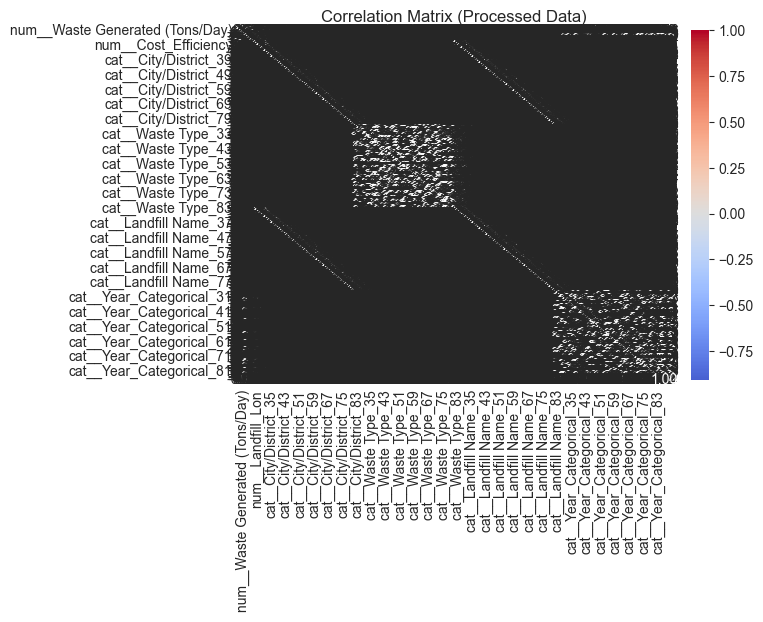

In [19]:
# Visualize the processed data
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
# Select only numerical columns from processed data
num_cols_processed = processed_data.select_dtypes(include=[np.number]).columns
corr_matrix = processed_data[num_cols_processed].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix (Processed Data)')


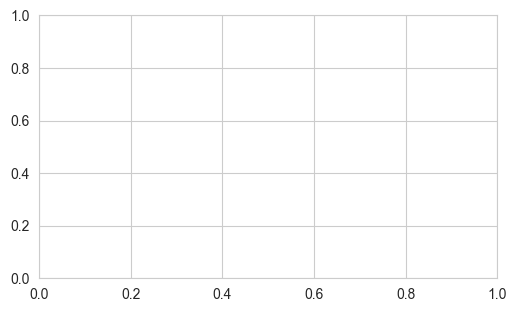

In [20]:
# 2. Distribution of processed numerical features (first 4)
plt.subplot(2, 2, 2)
if len(numerical_features) >= 4:
    sample_features = numerical_features[:4]
    for i, feature in enumerate(sample_features):
        if feature in processed_data.columns:
            plt.subplot(2, 2, i+1)
            sns.histplot(processed_data[feature], kde=True)
            plt.title(f'Distribution of {feature}')
    plt.tight_layout()

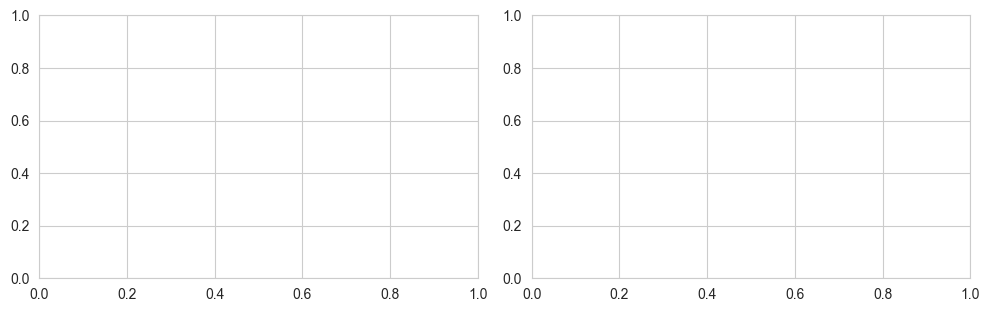

In [21]:
# 3. Target vs important features
plt.subplot(2, 2, 3)
if 'Municipal Efficiency Score (1-10)' in processed_data.columns:
    sns.scatterplot(x=processed_data['Municipal Efficiency Score (1-10)'], 
                   y=processed_data['Recycling_Rate'], alpha=0.6)
    plt.title('Recycling Rate vs Municipal Efficiency')

plt.subplot(2, 2, 4)
if 'Awareness Campaigns Count' in processed_data.columns:
    sns.scatterplot(x=processed_data['Awareness Campaigns Count'], 
                   y=processed_data['Recycling_Rate'], alpha=0.6)
    plt.title('Recycling Rate vs Awareness Campaigns')

plt.tight_layout()
plt.show()

In [22]:
#  Summary
print("\n=== PREPROCESSING SUMMARY ===")
print(f"Original dataset shape: {df.shape}")
print(f"Final processed shape: {processed_data.shape}")
print(f"Number of features created: {len(feature_names)}")
print(f"Missing values handled: {df.isnull().sum().sum()} → {processed_data.isnull().sum().sum()}")
print(f"Data leakage features removed: {features_to_drop}")

print("\nPreprocessing completed successfully! ✅")
print("Next step: Proceed to model training in 03_model_training.ipynb")


=== PREPROCESSING SUMMARY ===
Original dataset shape: (850, 13)
Final processed shape: (850, 236)
Number of features created: 235
Missing values handled: 0 → 0
Data leakage features removed: ['Disposal Method', 'Landfill Location (Lat, Long)']

Preprocessing completed successfully! ✅
Next step: Proceed to model training in 03_model_training.ipynb
